# Low and Lou (1990) nonlinear force-free fields

> Explain how to calculate magnetic field from the Low and Lou ODE

In [ ]:
import numpy as np
from zpinn.lowlouode import find_P_and_a2

## How to create coordinate points in Python

`bounds = [x_min, x_max, y_min, y_max, z_min, z_max]`

In [ ]:
bounds=[-1, 1, -1, 1, 0, 2]

The number of points in one axis == dimension or resolution

`dimension=64` means that there are 64 points in one axis like `[x_0, x_1, ..., x_63]`

`dimension = [Nx, Ny, Nz]`

where `Nx`, `Ny`, `Nz` respectively mean that the number of points in x-, y-, z-axis.

In [ ]:
dimension = [3, 5, 7]

In [ ]:
x_1D = np.linspace(bounds[0], bounds[1], dimension[0])
y_1D = np.linspace(bounds[2], bounds[3], dimension[1])
z_1D = np.linspace(bounds[4], bounds[5], dimension[2])

In [ ]:
x_1D.shape, y_1D.shape, z_1D.shape

((3,), (5,), (7,))

In the 3-D case, 
with inputs of length M, N and P, outputs are of shape (M, N, P) for 'ij' indexing.

Since I want to `(Nx, Ny, Nz)` shape 3D array, we choose `ij` indexing.g. 

In [ ]:
MESH = np.meshgrid(x_1D, y_1D, z_1D, indexing='ij')

In [ ]:
MESH[0].shape, MESH[1].shape, MESH[2].shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

The purpose of meshgrid is to create same shape array from 1D array. Then, the each element of the meshgrid array refers to coordinates of the points in space.

In [ ]:
x, y, z = MESH

For example, the coordinate (x, y, z) of [0][0][0] point is

In [ ]:
x[0][0][0], y[0][0][0], z[0][0][0]

(-1.0, -1.0, 0.0)

the coordinates (x, y, z) of [0][1][2] point is

In [ ]:
x[0][1][2], y[0][1][2], z[0][1][2]

(-1.0, -0.5, 0.6666666666666666)

So, the element-wise operations become point-wise operations which are very common in mathematics.

Then, we can calulate the magnetic field at (x, y, z)!

## Low and Lou nonlinear magnetic field calculation procedure.

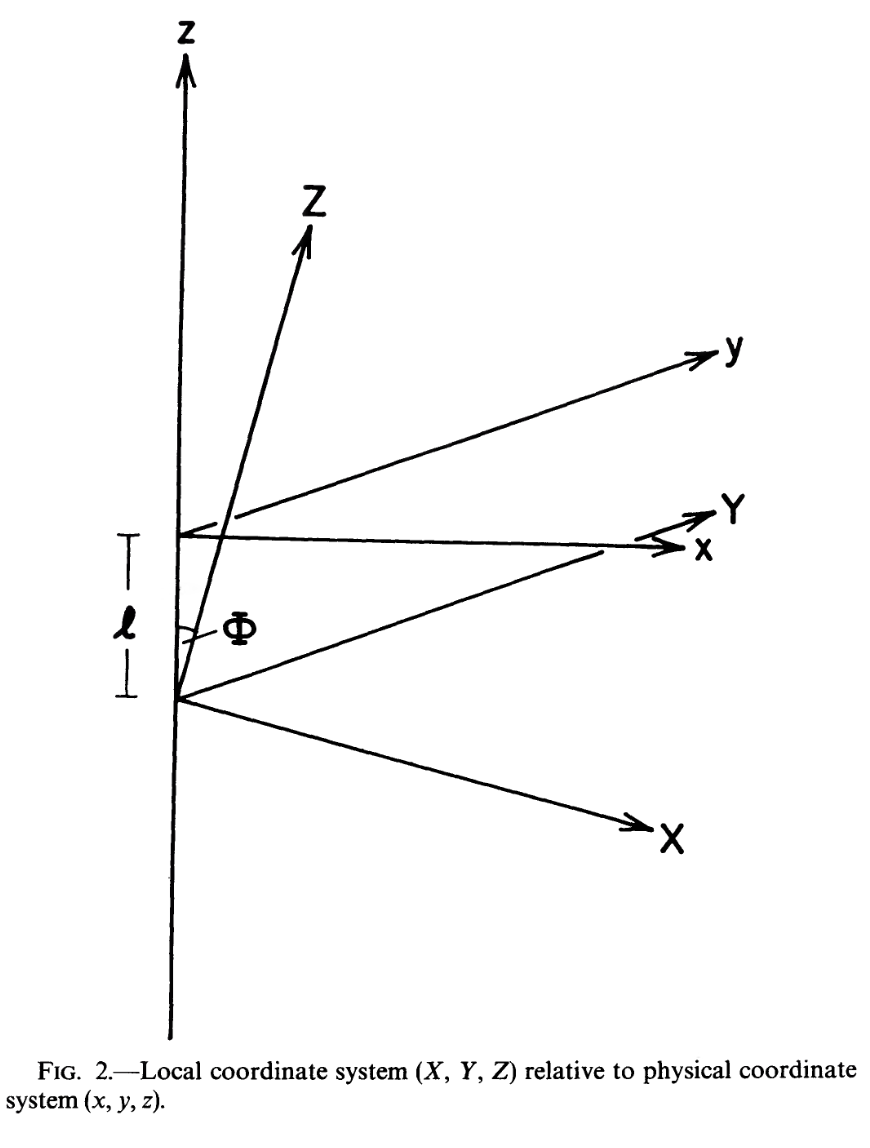

An point $P$ has physical coordinate system $(x, y, z)$ with $z > 0$. The coordinates of the physical domain are created in the previous section.

For the local coordinate system $(X, Y, Z)$, its origin $(X=0, Y=0, Z=0)$ is the location of a point source generating nonlinear force-free fields which is axisymmetric about $Z$-axis.

The local coordinate system can be obtained from the physical coordinate system $(x, y, z)$ by doing following transformation.

The location of a point source in physical coordinate system $(x, y, z)$ is $(x=0, y=0, z=l)$. (translational transformation).

The $Y$-axis of local coordinate system is same as the $y$-axis of physical coordinate sysetm.

In $xz$-plane, rotate $XZ$-plane clockwise by $0 < \Phi < \displaystyle \frac{\pi}{2}$.

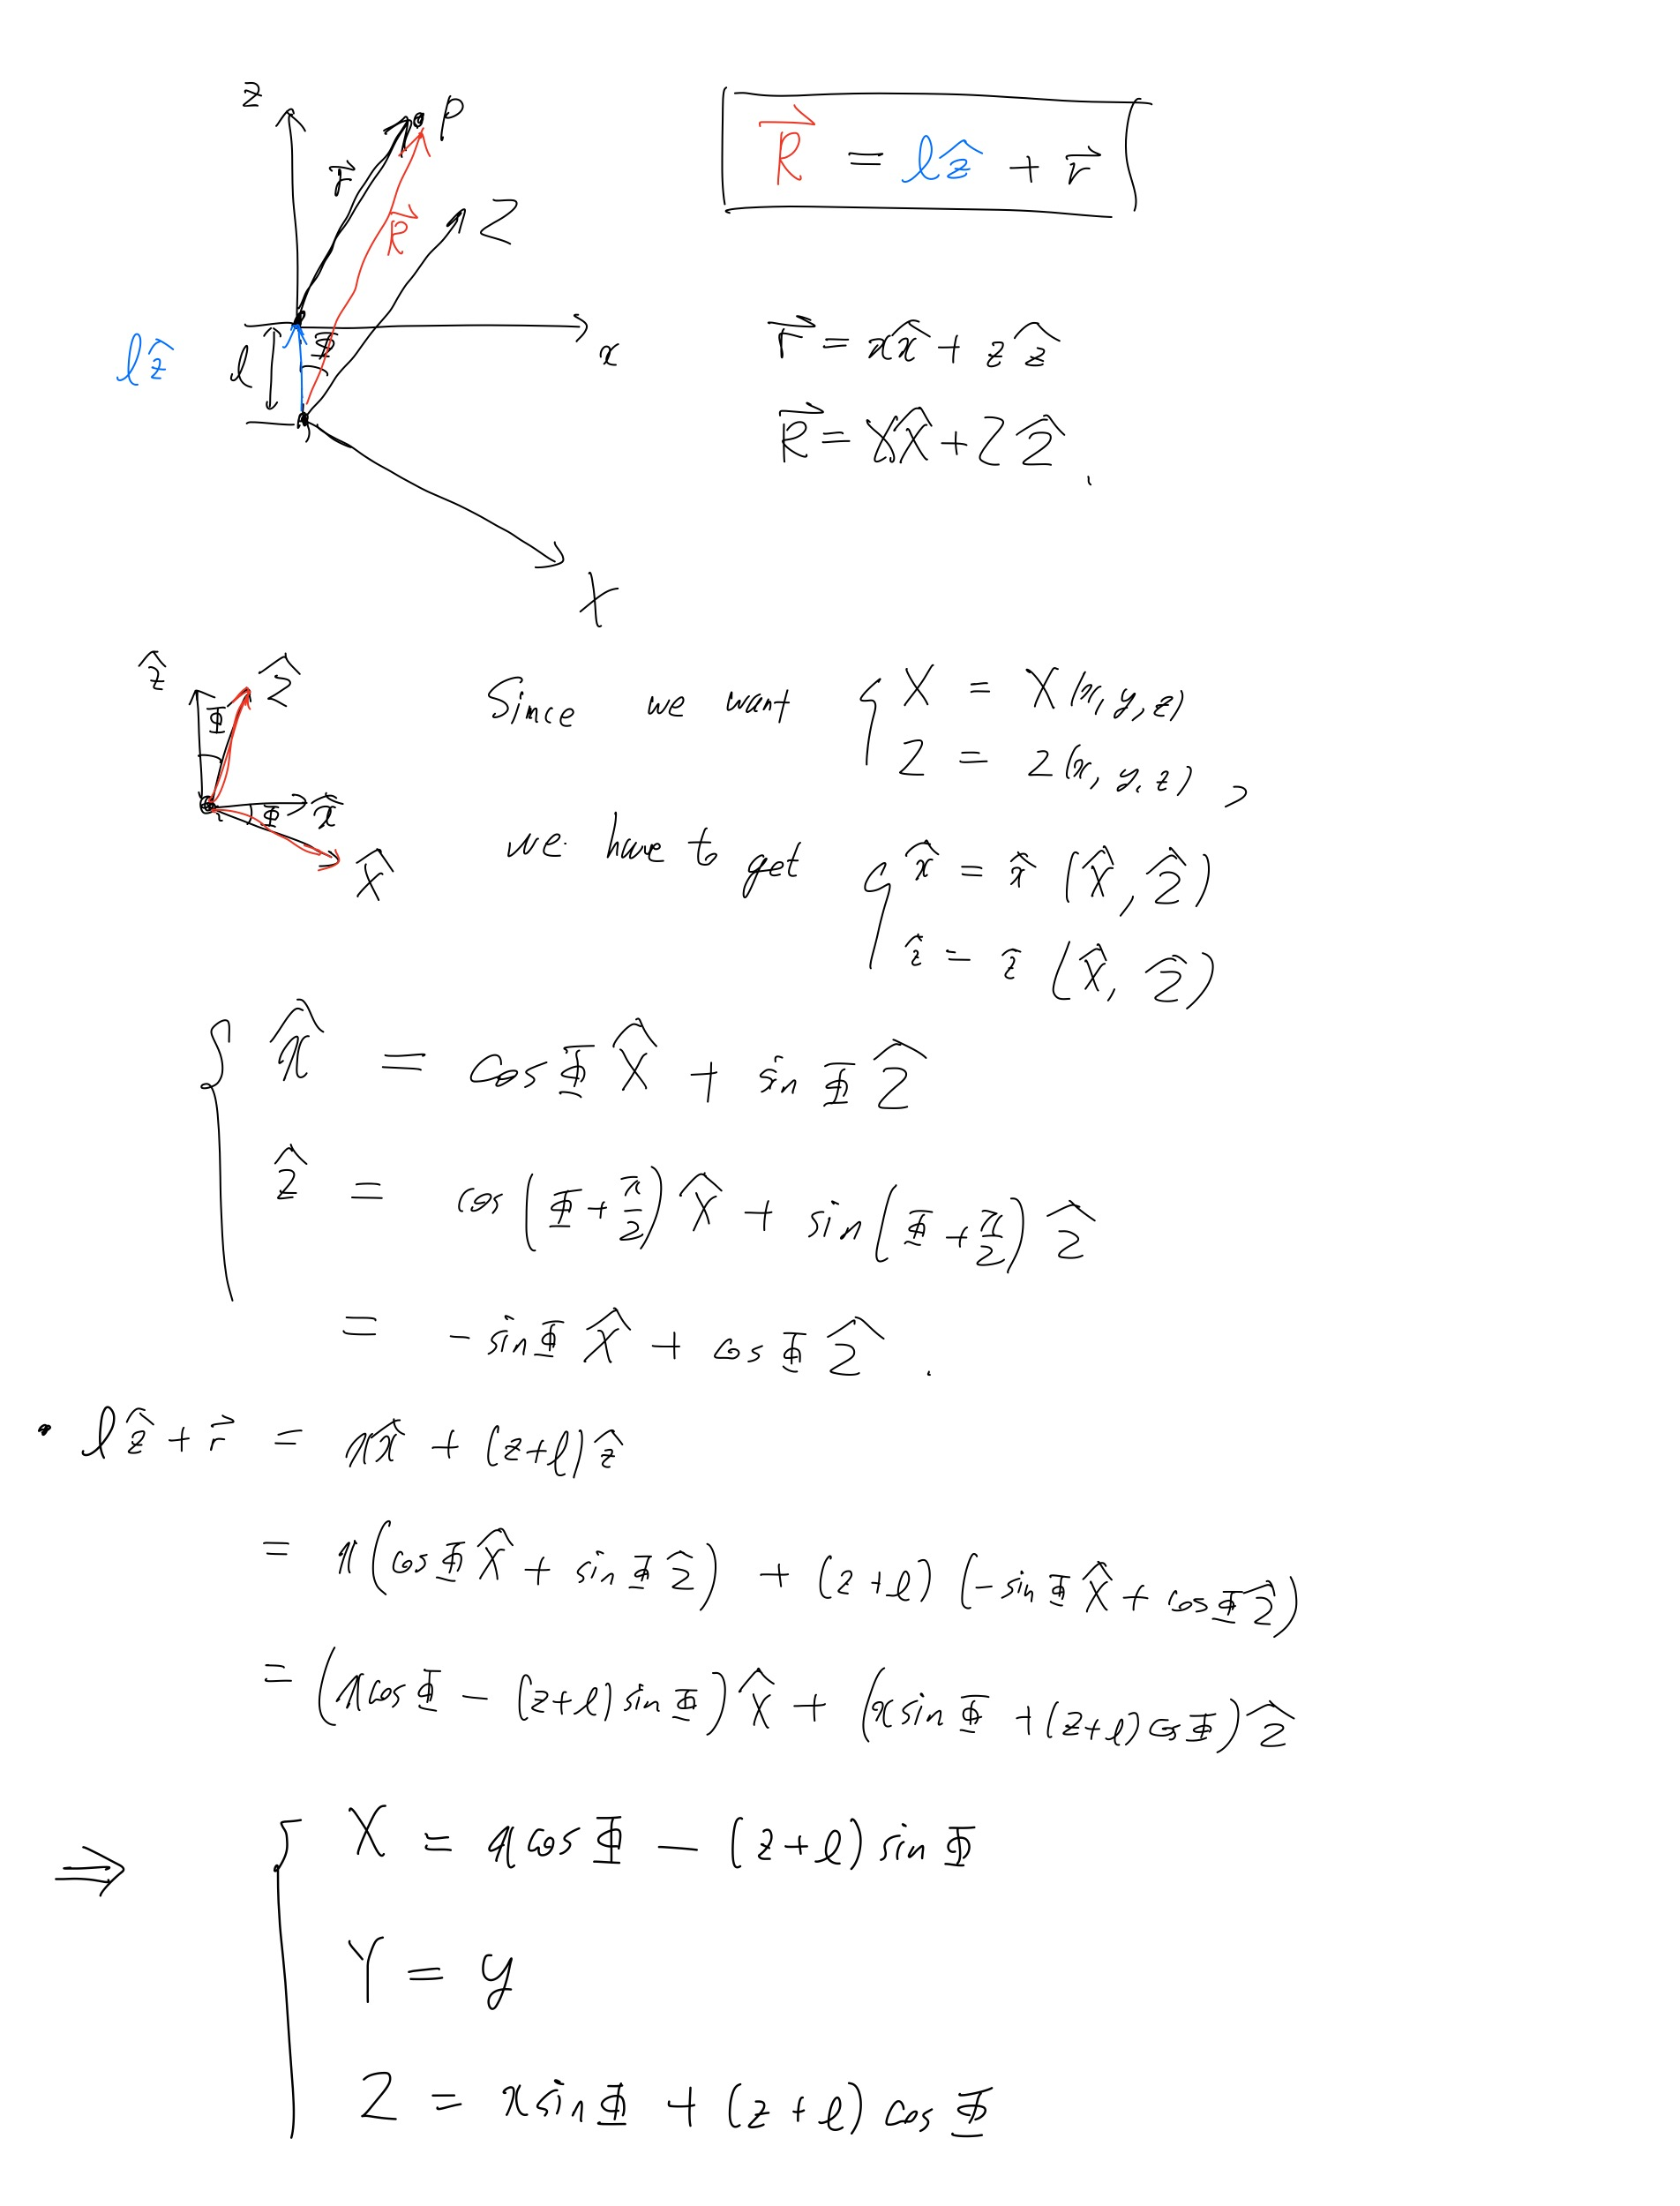

Use $l=0.3$ and $\Phi=\displaystyle\frac{\pi}{2}$

In [ ]:
l = 0.3
Phi = np.pi/2

In [ ]:
x.shape, y.shape, z.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

In [ ]:
X = x*np.cos(Phi) - (z+l)*np.sin(Phi)
Y = y
Z = x*np.sin(Phi) + (z+l)*np.cos(Phi)

In [ ]:
X.shape, Y.shape, Z.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

The physical coordinate $(x, y, z)$ of [0][0][0] point is

In [ ]:
x[0][0][0], y[0][0][0], z[0][0][0]

(-1.0, -1.0, 0.0)

The local coordinate $(X, Y, Z)$ of [0][0][0] point is

In [ ]:
X[0][0][0], Y[0][0][0], Z[0][0][0]

(-0.30000000000000004, -1.0, -1.0)

Since the Low-Lou force-free field is axisymmetric about $Z$-axis, it is written as spherical coordinates $(r, \theta, \phi)$ constructed by local coordinate $(X, Y, Z)$.

The transformation from local Cartesian coordinate $(X, Y, Z)$ to the local spherical coordinates $(r, \theta, \phi)$ is very well known as 

$$r = \sqrt{X^2 + Y^2 + Z^2}$$

$$\theta= \arccos\frac{Z}{r}$$

$$\phi = \arctan2\frac{Y}{X}$$

In [ ]:
r = np.sqrt(X**2 + Y**2 + Z**2)
theta = np.arccos(Z/r)
phi = np.arctan2(Y, X)

In [ ]:
r.shape, theta.shape, phi.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

The local spherical coordinate $(r, \theta, \phi)$ of [0][0][0] point is

In [ ]:
r[0][0][0], theta[0][0][0], phi[0][0][0]

(1.445683229480096, 2.3346567297775978, -1.8622531212727638)

The formula of Low-Lou force-free field $\mathbf{B}(r, \theta, \phi)$ is

$$
\mathbf{B}(r, \theta, \phi) = B_r \hat{r} + B_\theta \hat{\theta} + B_\phi \hat{\phi}
$$

where

$$
B_r = \frac{1}{r^2 \sin\theta} \frac{\partial A}{\partial \theta}
$$

$$
B_\theta = -\frac{1}{r \sin\theta} \frac{\partial A}{\partial r}
$$

$$
B_\phi = \frac{Q}{r \sin\theta}
$$

Here, $A(r, \theta)$ and $Q(A)$ are defined by 

$$
A(r, \theta) = \frac{P_{n,m}(\mu)}{r^n}
$$

$$
Q(A) = \begin{cases}
\sqrt{a^2 _{n,m}} A^{1 + \frac{1}{n}} \quad \text{for odd } n\\
\\
\sqrt{a^2 _{n,m}} A|A|^{\frac{1}{n}} \quad \text{for even } n
\end{cases}
$$

$\mu = \cos\theta$.

$P_{n,m}(\mu)$ & $a^2 _{n,m}$ are eigenfunction and eigenvalues for Low-Lou ODE with fixed $n$. And $m$ is just used for denoting differenct eigenfunction and eigenvalues.

$$
\displaystyle (1-\mu^2)\frac{d^2 P_{n,m}}{d\mu^2} + n(n+1)P_{n,m} + a^2 _{n,m} \frac{1+n}{n}P_{n,m}^{1 + \frac{2}{n}} = 0
$$

Then,

$$
\frac{\partial A}{\partial \theta} 
=\frac{\partial}{\partial \theta}\frac{P_{n,m}(\mu)}{r^n}
= \frac{1}{r^n} \frac{d\mu}{d\theta}\frac{d}{d\mu} P_{n,m}(\mu)
= \frac{1}{r^n} (-\sin\theta) P'_{n,m}(\mu)
$$

$$
\frac{\partial A}{\partial r}
= \frac{\partial}{\partial r}\frac{P_{n,m}(\mu)}{r^n}
= P_{n,m}(\mu) \frac{d}{dr}\frac{1}{r^n}
= P_{n,m}(\mu) (-n r^{-n-1})
$$

For each physical coordinate $(x, y, z)$, 

1. Calculate corresponding local Cartesian coordinate $(X, Y, Z)$
2. Calculate corresponding local spherical coordinate $(r, \theta, \phi)$
3. Calculate corresponding $\mu = \cos\theta$
4. Calculate corresponding $P'_{n,m}(\mu)$ and $P_{n,m}(\mu)$ by solving Low-Lou ODE
5. Calculate corresponding $(B_r, B_\theta, B_\phi)$

In [ ]:
mu = np.cos(theta)
mu.shape

(3, 5, 7)

In [ ]:
n = 1
m = 1
S, a2 = find_P_and_a2(n, m)

Here, `S` refers to $\mathbf{S}(\mu)$ and `a2` refers to $a^2$

$$
\mathbf{S}(\mu) = \begin{bmatrix}
                     P(\mu) \\
                     P'(\mu)
                 \end{bmatrix}
$$

More exactly, `S` refers to  $\mathbf{S}_{n,m}(\mu)$ and `a2` refers to $a^2 _{n,m}$

$$
\mathbf{S}_{n,m}(\mu) = \begin{bmatrix}
                     P_{n,m}(\mu) \\
                     P'_{n,m}(\mu)
                 \end{bmatrix}
$$

In this case ($n=1, m=1$),

More exactly, `S` refers to  $\mathbf{S}_{1,1}(\mu)$ and `a2` refers to $a^2 _{1,1} = 0.425$

$$
\mathbf{S}_{1,1}(\mu) = \begin{bmatrix}
                     P_{1,1}(\mu) \\
                     P'_{1,1}(\mu)
                 \end{bmatrix}
$$

In [ ]:
a2

0.4274037235392911

Then,

$$
A = (r^{-n})P_{n,m}(\mu)
$$

$$
\frac{\partial A}{\partial \theta} = (- r^{-n}\sin\theta) P'_{n,m}(\mu)
$$

$$
\frac{\partial A}{\partial r} = (-n r^{-n-1}) P_{n,m}(\mu) 
$$

For $n=1$,

$$
Q(A) = \sqrt{a^2 _{n,m}} A^{1 + \frac{1}{n}}
$$

In [ ]:
P, dP = S(mu)
P.shape, dP.shape

((3, 5, 7), (3, 5, 7))

In [ ]:
A = r**(-n) * P
dA_dtheta = -r**(-n) * np.sin(theta) * dP
dA_dr = -n*r**(-n-1) * P
Q = np.sqrt(a2) * A ** (1 + 1 / n)
# Q = np.sqrt(a2) * A * np.abs(A) ** (1 / n)

A.shape, dA_dtheta.shape, dA_dr.shape, Q.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7), (3, 5, 7))

Also, we can calculate force-free $\alpha$

$$
\alpha = \frac{dQ}{dA} = \sqrt{a^2 _{n,m}} \frac{d}{dA} A^{1 + \frac{1}{n}}
= \sqrt{a^2 _{n,m}} \left(1 + \frac{1}{n} \right) A^{\frac{1}{n}}
$$

In [ ]:
alpha = np.sqrt(a2) * (1 + 1/n) * A**(1/n)
alpha.shape

(3, 5, 7)

The distribution of the scalar $\alpha$ on $z=0$

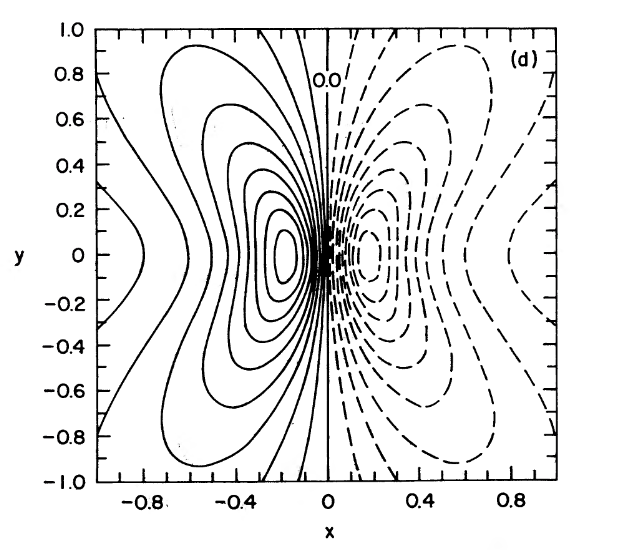

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib widget

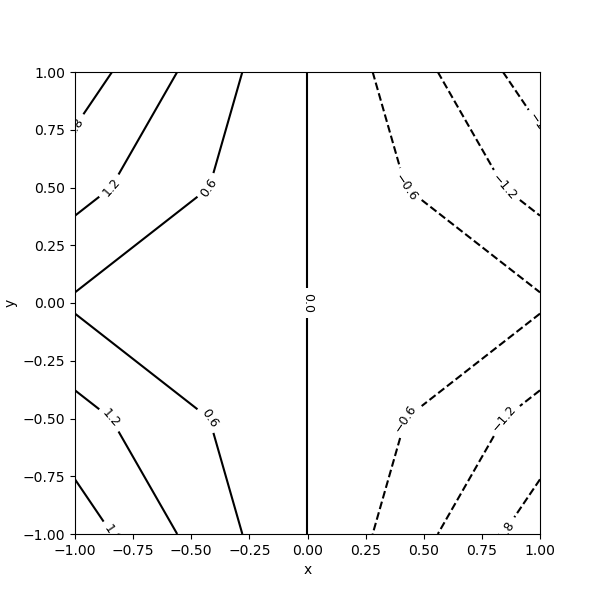

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(6,6))
# levels = np.arange(-10, 10, 1)
CS = plt.contour(x[:,:,0], y[:,:,0], alpha[:, :, 0], origin='lower', colors='k')
# CS = plt.contour(x[:,:,0], y[:,:,0], alpha[:, :, 0], origin='lower', levels=levels, colors='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.clabel(CS, fontsize=9, inline=True)
plt.show()

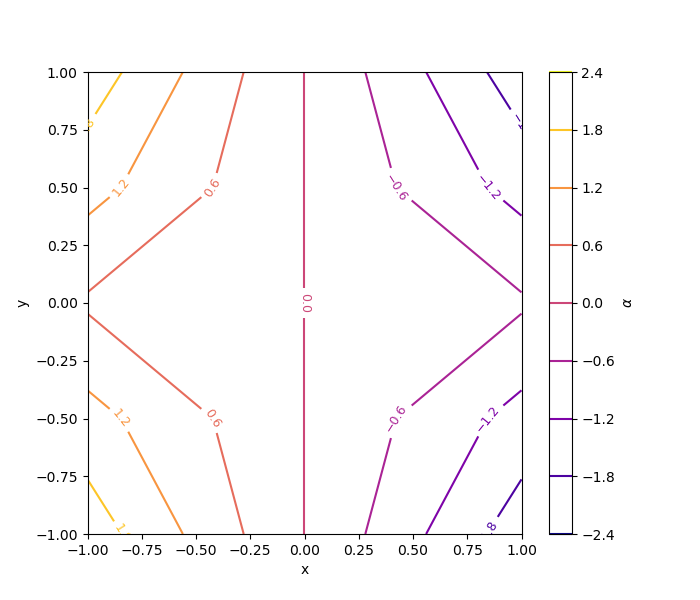

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(7,6))
# levels = np.arange(-10, 10, 1)
CS = plt.contour(x[:,:,0], y[:,:,0], alpha[:, :, 0], origin='lower', cmap='plasma')
# CS = plt.contour(x[:,:,0], y[:,:,0], alpha[:, :, 0], origin='lower', levels=levels, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'$\alpha$')
ax.clabel(CS, fontsize=9, inline=True)
plt.show()

We can directly calculate the magnetic field in the local spherical coordinate.

As the reminder, the formula of Low-Lou force-free field $\mathbf{B}(r, \theta, \phi)$ is

$$
\mathbf{B}(r, \theta, \phi) = B_r \hat{r} + B_\theta \hat{\theta} + B_\phi \hat{\phi}
$$

where

$$
B_r = \frac{1}{r^2 \sin\theta} \frac{\partial A}{\partial \theta}
$$

$$
B_\theta = -\frac{1}{r \sin\theta} \frac{\partial A}{\partial r}
$$

$$
B_\phi = \frac{Q}{r \sin\theta}
$$

In [ ]:
Br = (r**2 * np.sin(theta))**(-1) * dA_dtheta
Btheta = -1 * (r*np.sin(theta))**(-1) * dA_dr
Bphi = (r*np.sin(theta))**(-1) * Q

Br.shape, Btheta.shape, Bphi.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

For each physical coordinate $(x, y, z)$, 

1. Calculate corresponding local Cartesian coordinate $(X, Y, Z)$
2. Calculate corresponding local spherical coordinate $(r, \theta, \phi)$
3. Calculate corresponding $\mu = \cos\theta$
4. Calculate corresponding $P'_{n,m}(\mu)$ and $P_{n,m}(\mu)$ by solving Low-Lou ODE
5. Calculate corresponding $(B_r, B_\theta, B_\phi)$ -> done!
---
What is the next step?

6. Calculate corresponding $(B_X, B_Y, B_Z)$
7. Calculate corresponding $(B_x, B_y, B_z)$

Then, we get a vector $(B_x, B_y, B_z)$ at the point $(x, y, z)$ !!

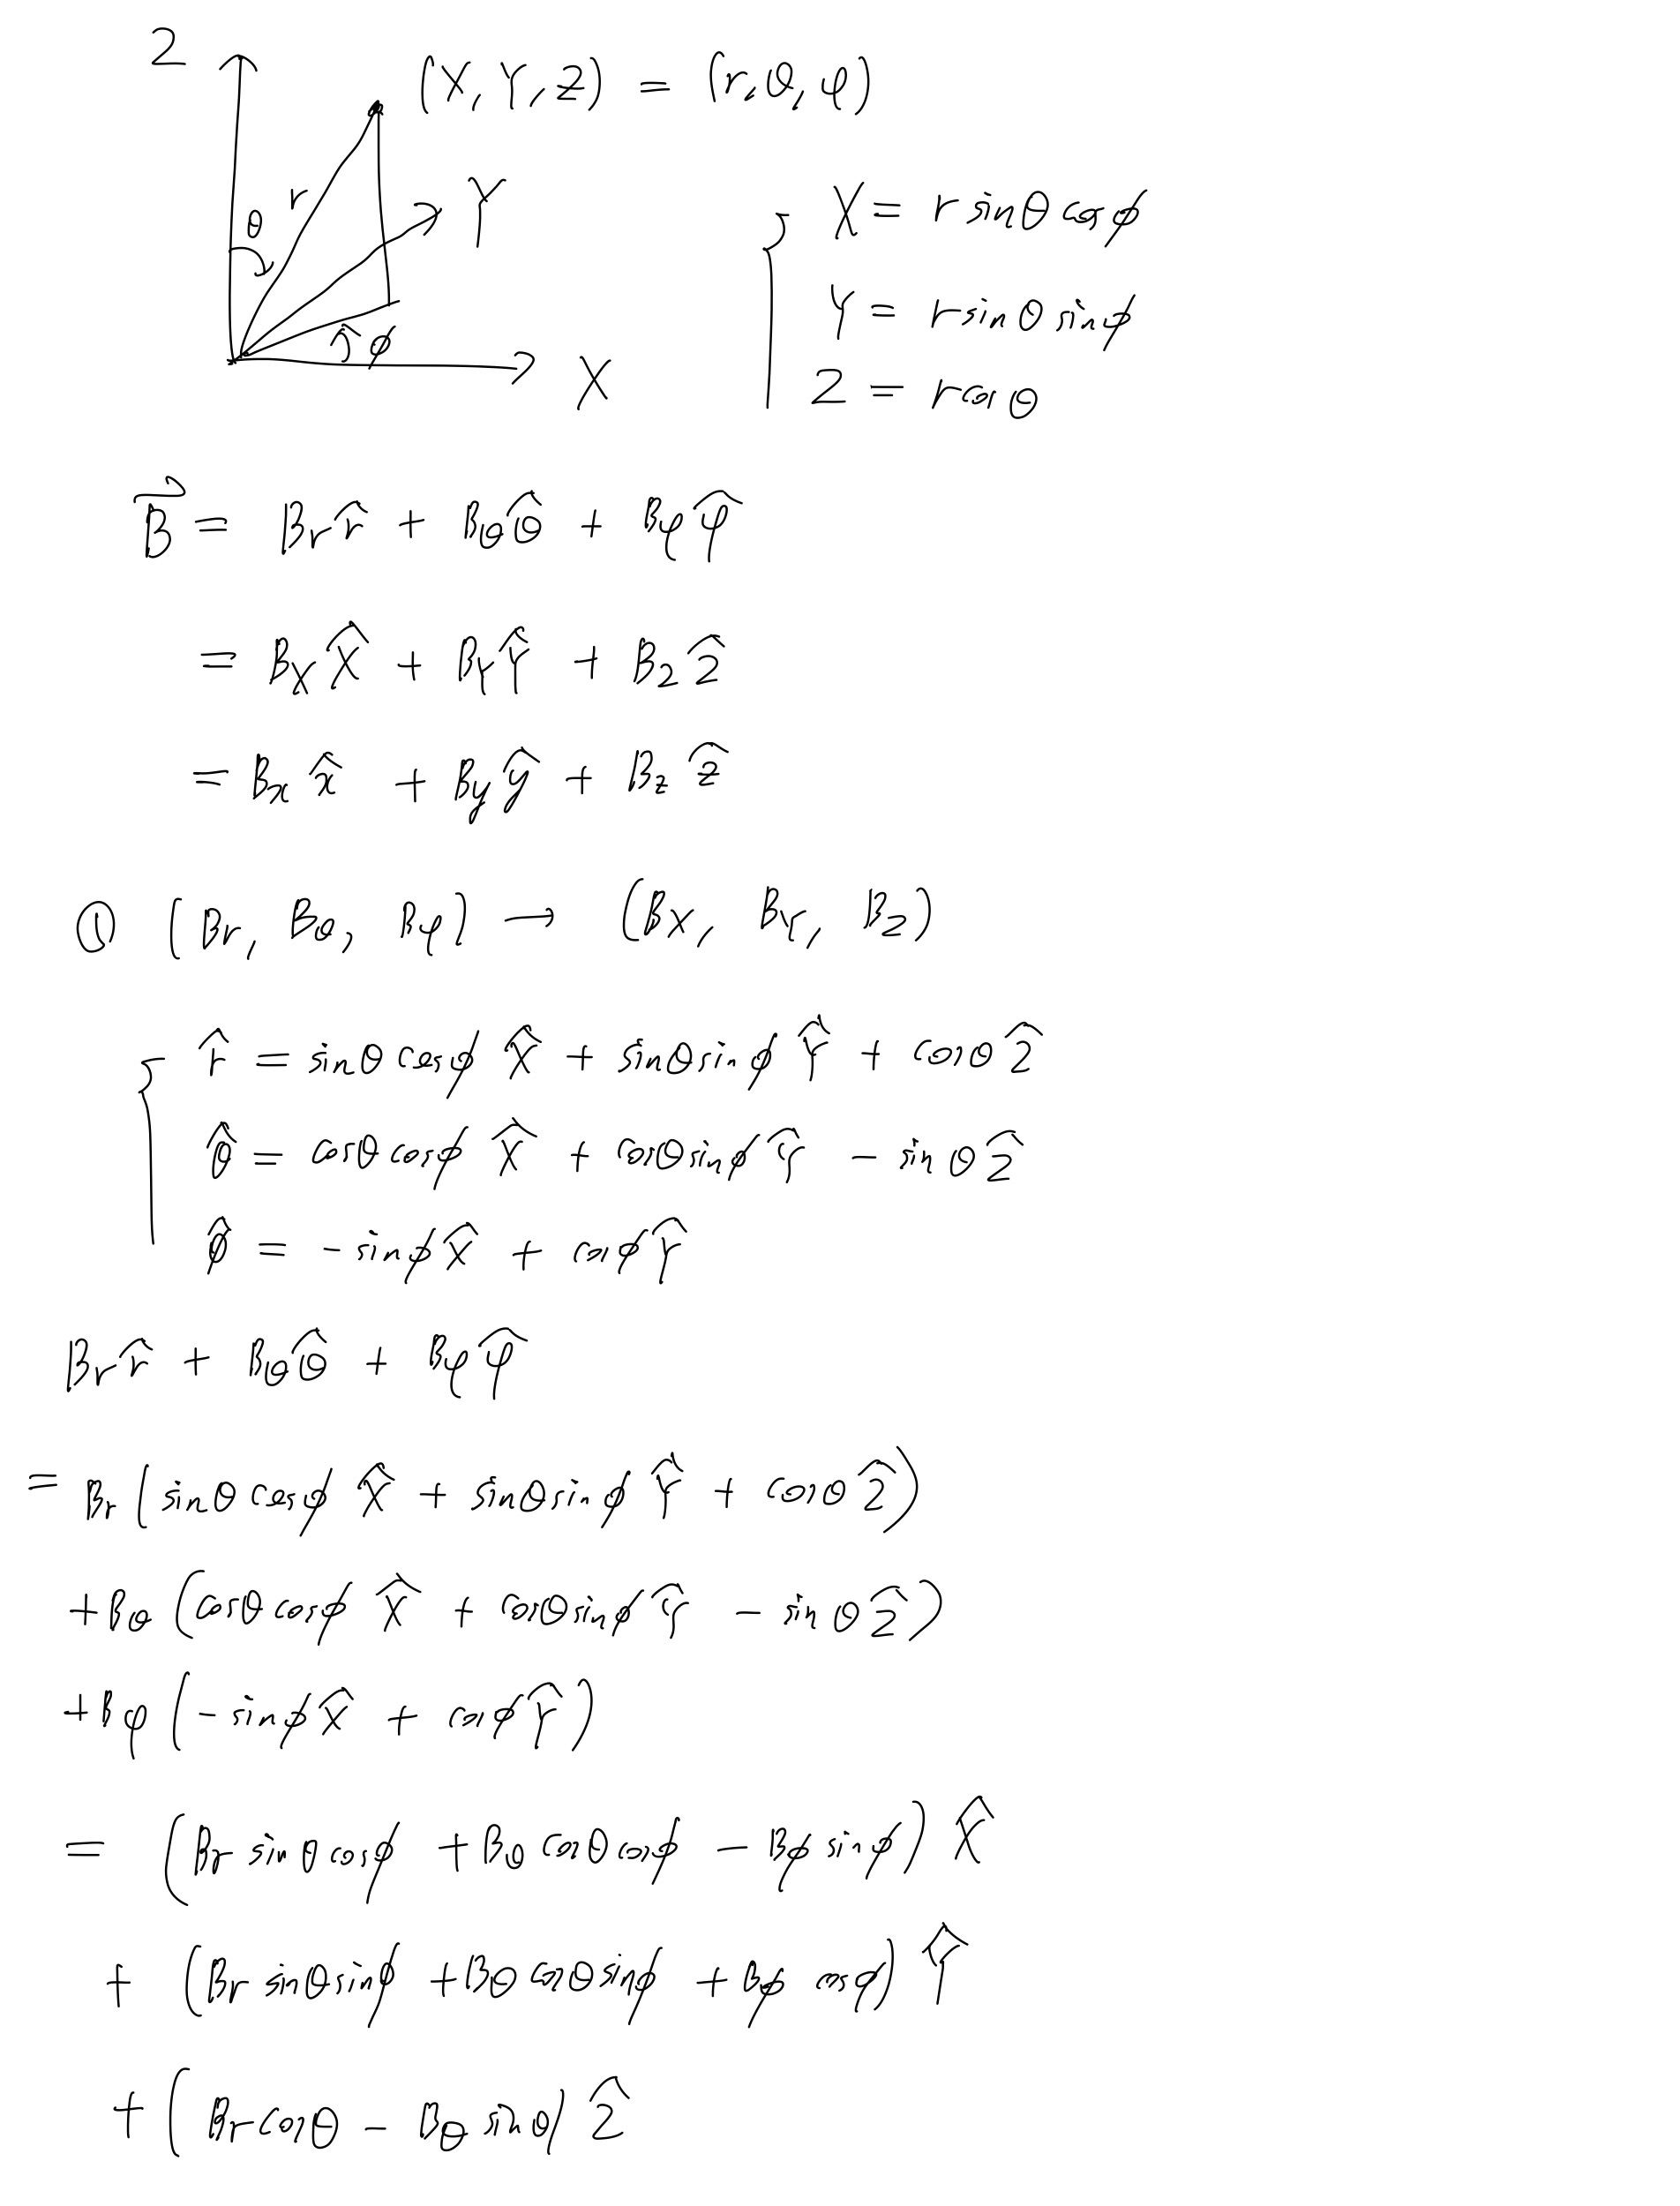
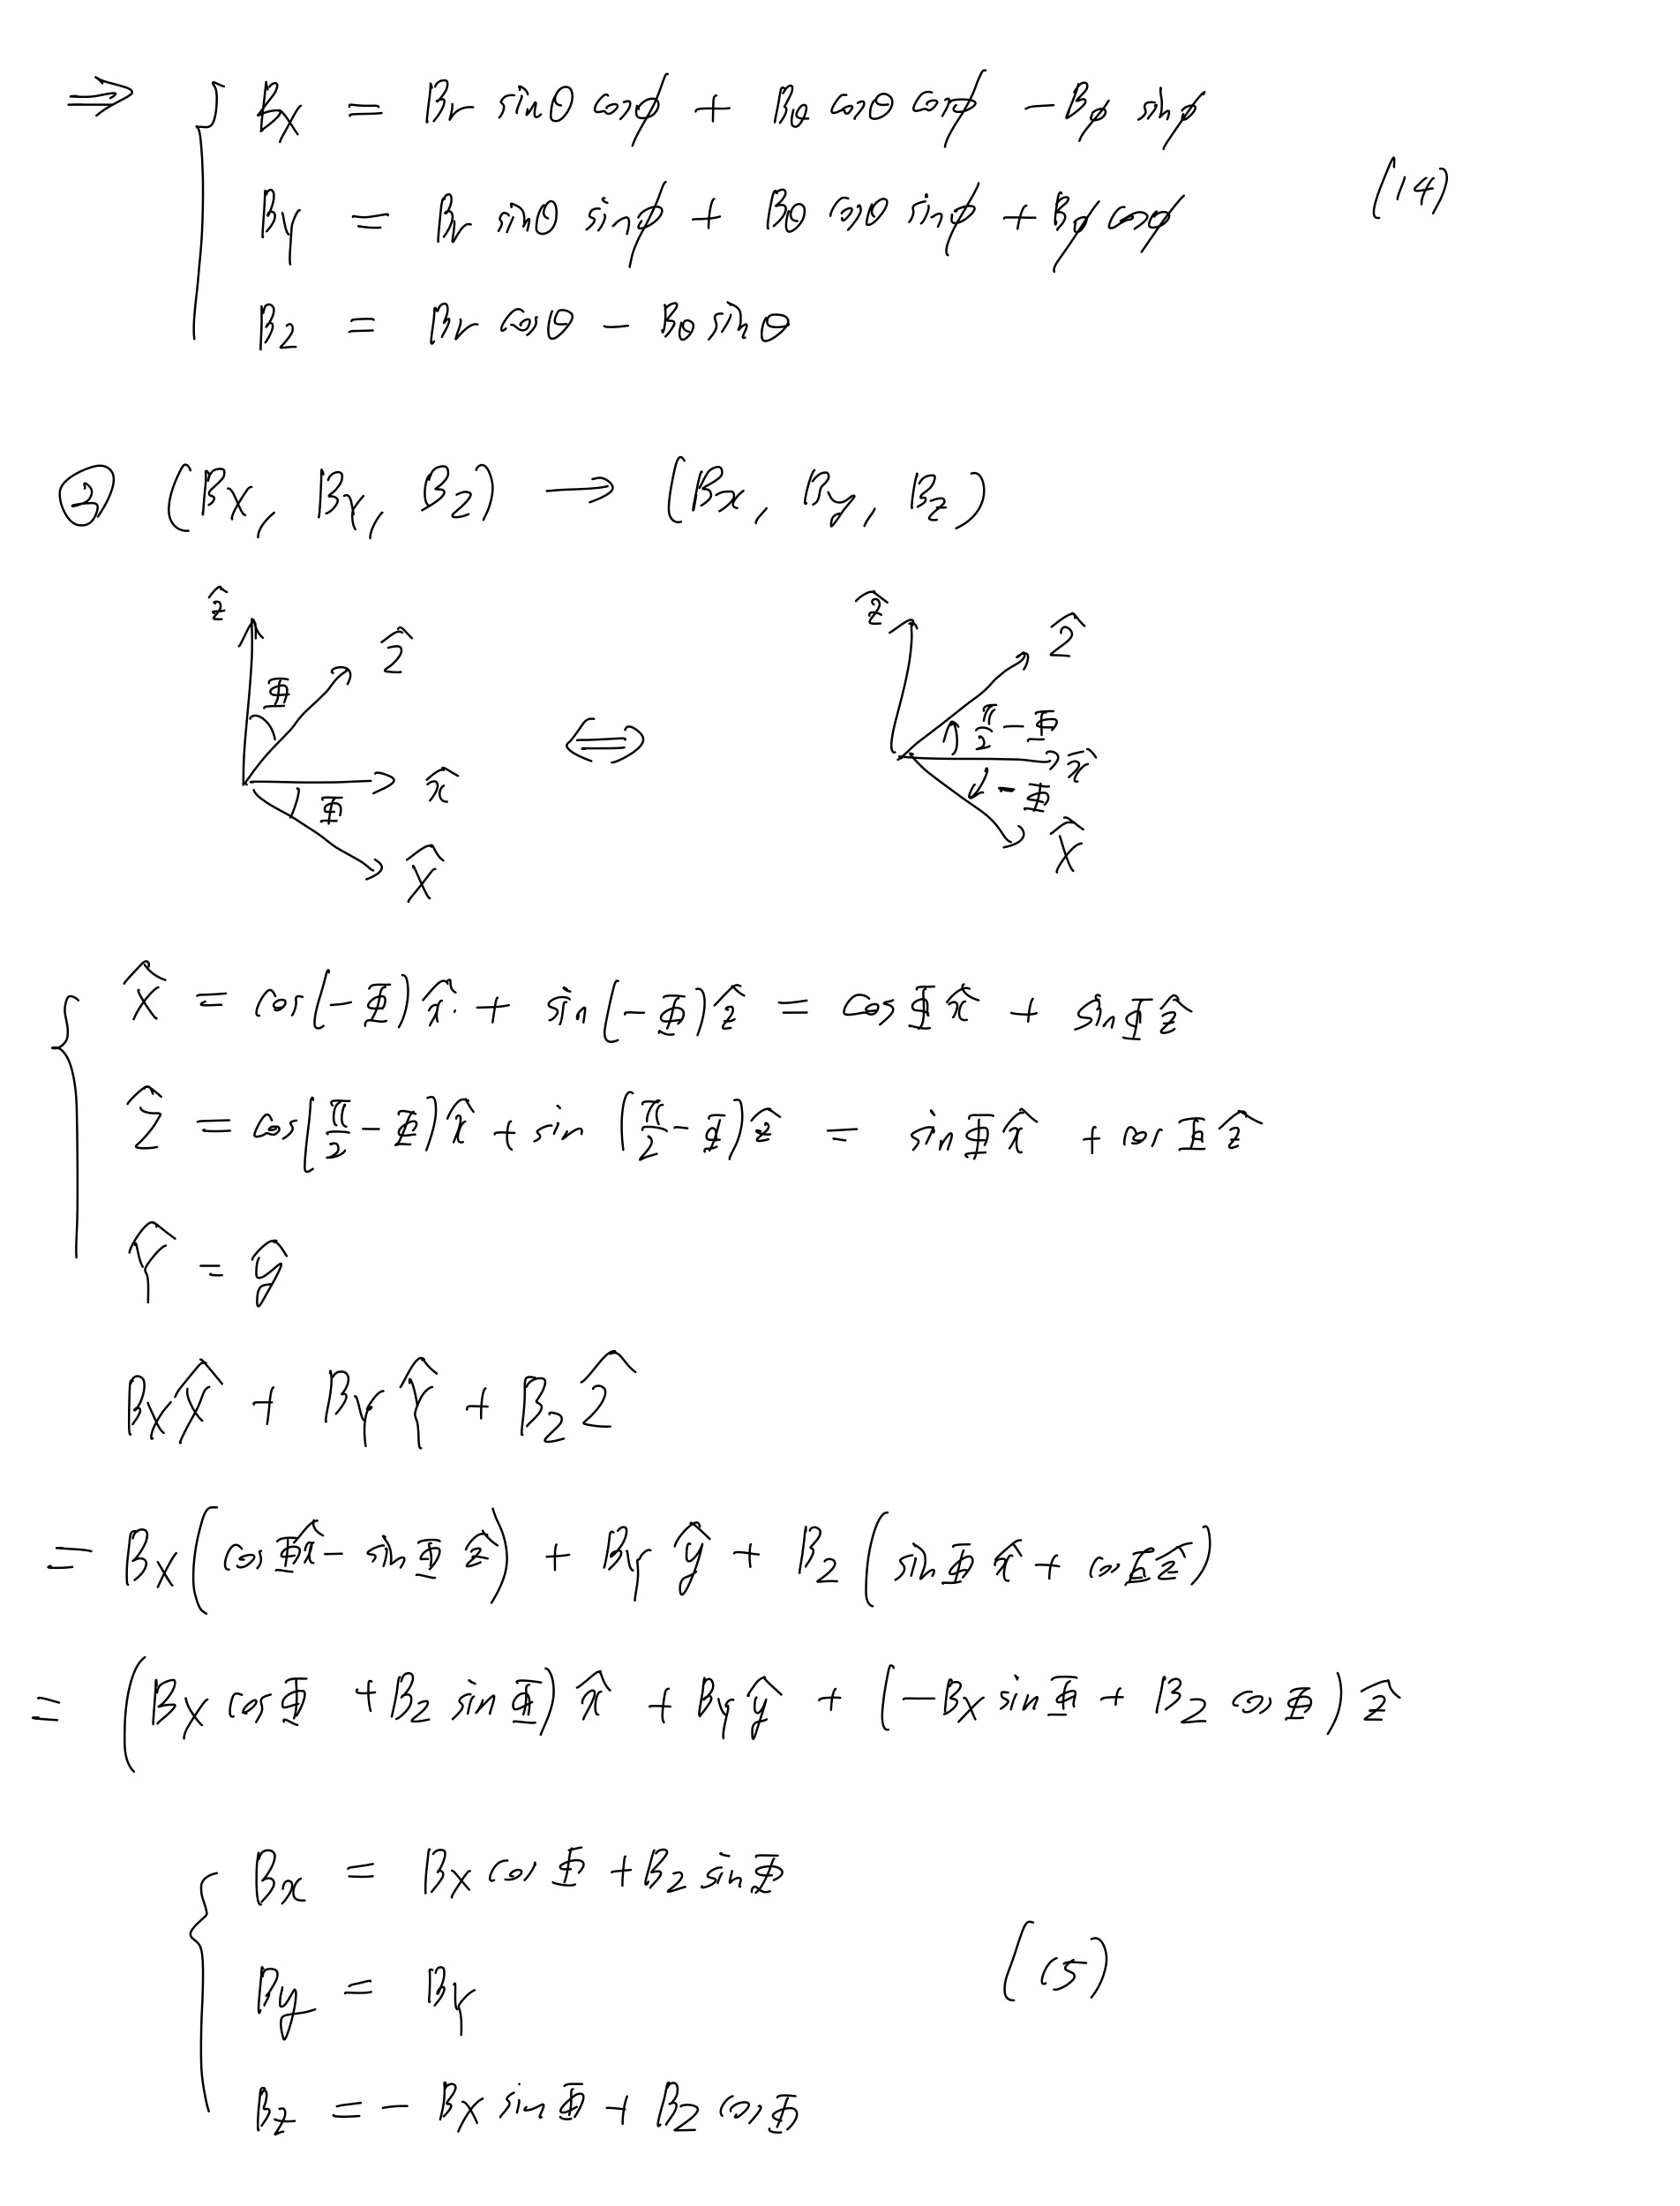

In [ ]:
BX = Br * np.sin(theta) * np.cos(phi) + Btheta * np.cos(theta) * np.cos(phi) - Bphi * np.sin(phi)
BY = Br * np.sin(theta) * np.sin(phi) + Btheta * np.cos(theta) * np.sin(phi) + Bphi * np.cos(phi)
BZ = Br * np.cos(theta) - Bphi * np.sin(theta)

BX.shape, BY.shape, BZ.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

In [ ]:
Bx = BX * np.cos(Phi) + BZ * np.sin(Phi)
By = BY
Bz = - BX * np.sin(Phi) + BZ * np.cos(Phi)

Bx.shape, By.shape, Bz.shape

((3, 5, 7), (3, 5, 7), (3, 5, 7))

The parameters $n$, $m$, $l$, $\Phi$ are

In [ ]:
n, m, l, Phi

(1, 1, 0.3, 1.5707963267948966)

For [0][0][0] point,

- physical coordinate $(x, y, z)$
- local Cartesian coordinate $(X, Y, Z)$
- local spherical coordinate $(r, \theta, \phi)$
- corresponding $\mu = \cos\theta$
- corresponding eigenfuntion $P_{n,m}(\mu)$ and $P'_{n,m}(\mu)$
- magnetic field component in local spherical coord. $(B_r, B_\theta, B_\phi)$
- magnetic field component in local Cartesian coord. $(B_X, B_Y, B_Z)$
- magnetic field component in physical coord. $(B_x, B_y, B_z)$

In [ ]:
x[0][0][0], y[0][0][0], z[0][0][0]

(-1.0, -1.0, 0.0)

In [ ]:
X[0][0][0], Y[0][0][0], Z[0][0][0]

(-0.30000000000000004, -1.0, -1.0)

In [ ]:
r[0][0][0], theta[0][0][0], phi[0][0][0]

(1.445683229480096, 2.3346567297775978, -1.8622531212727638)

In [ ]:
mu[0][0][0]

-0.6917144638660747

In [ ]:
P[0][0][0], dP[0][0][0]

(2.3671821639604054, 4.145376627898734)

In [ ]:
Br[0][0][0], Btheta[0][0][0], Bphi[0][0][0]

(-1.3719698429138414, 1.0848561237071588, 1.6788928338791695)

In [ ]:
BX[0][0][0], BY[0][0][0], BZ[0][0][0]

(2.1084200215587945, 1.185348144758657, -0.2634365035515541)

In [ ]:
Bx[0][0][0], By[0][0][0], Bz[0][0][0]

(-0.263436503551554, 1.185348144758657, -2.1084200215587945)

The position vector $\mathbf{r}$ can be constructed using coordinates mesh grid array `x`, `y`, `z`.

For a mesh grid array, each element corresponds to a point in space. Therefore, we need to stack these arrays in an element-wise manner.

If we stack these arrays using `axis=-1` keyword, we will obtain the expected result.

In [ ]:
r = np.stack([x, y, z], axis=-1)
r.shape

(3, 5, 7, 3)

The [0][0][0] point becomes `r[0][0][0]`.

In [ ]:
x[0][0][0], y[0][0][0], z[0][0][0]

(-1.0, -1.0, 0.0)

In [ ]:
r[0, 0, 0]

array([-1., -1.,  0.])

In the same way, I create magnetic vector field $B$ using components `Bx`, `By`, `Bz`

In [ ]:
B = np.stack([Bx, By, Bz], axis=-1)
B.shape

(3, 5, 7, 3)

The magnetic field at `r[0][0][0]` is

In [ ]:
B[0][0][0]

array([-0.2634365 ,  1.18534814, -2.10842002])

To create magnetic field data (Point + Vector), we first use `np.reshape` to flattening

In [ ]:
r_vec = np.reshape(r, (-1, 3))
# equivalently,
# r_vvv = np.c_[x.reshape(-1), y.reshape(-1), z.reshape(-1)]
r_vec.shape

(105, 3)

The [0][0][0] point is `r_vec[0]`.

In [ ]:
r_vec[0]

array([-1., -1.,  0.])

In [ ]:
B_vec = np.reshape(B, (-1, 3))
B_vec.shape

(105, 3)

The magnetic field at `r[0][0][0]` is

In [ ]:
B_vec[0]

array([-0.2634365 ,  1.18534814, -2.10842002])

We can always recover original shape using `np.reshape`

In [ ]:
r_recover = np.reshape(r_vec, (*dimension, 3))
r_recover.shape

(3, 5, 7, 3)

We can check whether this recovery is ok

In [ ]:
r[0][0][0], r_recover[0][0][0]

(array([-1., -1.,  0.]), array([-1., -1.,  0.]))

We have `r_vec` and `B_vec`. Let's combine these to create `mag` which is magnetc field data (Point + Vector)

I think it is only useful for shuffing data... (PINN)

In [ ]:
mag = np.stack([r_vec, B_vec], axis=1)
mag.shape

(105, 2, 3)

We can check whether this works

In [ ]:
mag[0]

array([[-1.        , -1.        ,  0.        ],
       [-0.2634365 ,  1.18534814, -2.10842002]])

In [ ]:
r_vec[0], B_vec[0]

(array([-1., -1.,  0.]), array([-0.2634365 ,  1.18534814, -2.10842002]))

## How to visualize magnetic field?

### $B_z$ (normal component) at $z=0$

In [ ]:
B_vec.shape

(105, 3)

In [ ]:
B_recover = np.reshape(B_vec, (*dimension, 3))
B_recover.shape

(3, 5, 7, 3)

In [ ]:
Bz_recover = B_recover[:, :, :, 0]
Bz_recover.shape

(3, 5, 7)

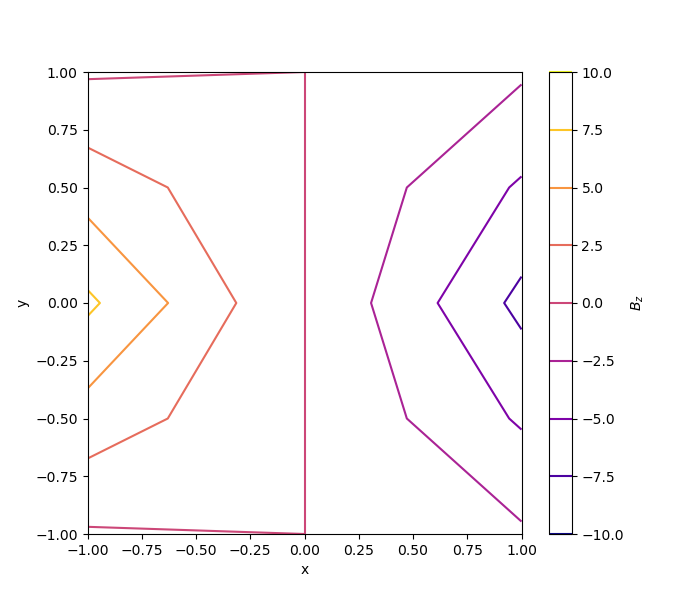

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(7,6))
# levels = np.arange(-50, 50, 5)
CS = plt.contour(x[:,:,0], y[:,:,0], Bz_recover[:, :, 0], origin='lower', cmap='plasma')
# CS = plt.contour(x[:,:,0], y[:,:,0], Bz_recover[:, :, 0], origin='lower', levels=levels, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'$B_z$')
# ax.clabel(CS, fontsize=9, inline=True)
plt.show()

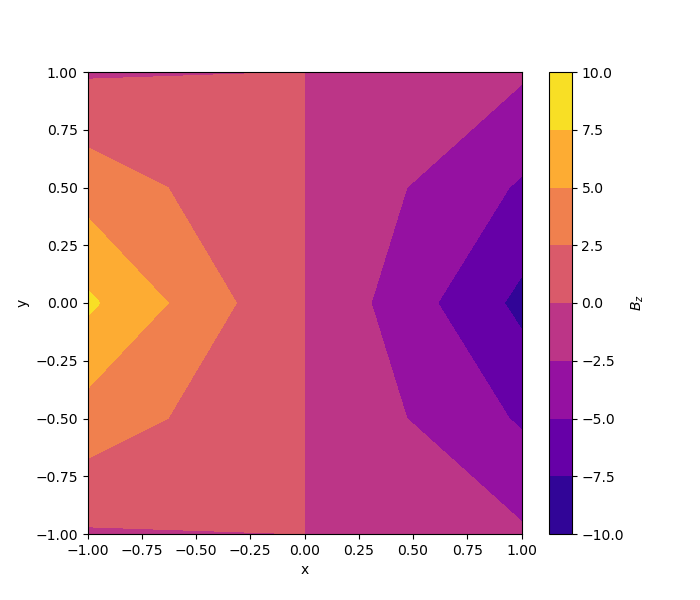

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(7,6))
# levels = np.arange(-10, 10, 1)
CS = plt.contourf(x[:,:,0], y[:,:,0], Bz_recover[:, :, 0], origin='lower', cmap='plasma')
# CS = plt.contour(x[:,:,0], y[:,:,0], alpha[:, :, 0], origin='lower', levels=levels, cmap='seismic')
ax.set_xlabel('x')
ax.set_ylabel('y')
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'$B_z$')
plt.show()